# Project: Compare Suicide Rates with Economic, Health, and Lifestyle Factors

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


We will compare suicide rates versus income and inequality. 

Correlation is not causation, and we're investigating complex issues on a very macro (nation-sized) level. So we cannot hope to reach anything approximating a definitive conclusion. But perhaps we'll notice trends intriguing enough to guide us towards further and more precise investigations.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# reading the files
# annual suicides per 100,000 people
df_sui_rate = pd.read_csv('suicide_per_100000_people.csv')
# income rates
df_income = pd.read_csv('demox_eiu.csv')
# inequality index
df_inequality = pd.read_csv('inequality_index_gini.csv')

df_sui_rate.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.06,5.34,NaN,3.08,NaN,NaN,NaN,NaN,NaN,NaN
1,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.74,NaN,NaN,NaN,2.39,1.92,1.54,2.02,1.85
4,Australia,9.11,9.41,10.5,10.8,10.7,10.3,10.8,12.2,12.5,...,9.71,9.96,9.62,9.82,9.73,10.30,10.20,11.20,11.60,NaN


In [3]:
# For each data set, we only want to look at the years from 2012 
#through the end of 2016 (the last four years of the suicide rate data set).
# Here we will refine each data set so that it begins at 2015
df_sui_5yr = df_sui_rate.loc[:, ['country', '2012', '2013', '2014', '2015','2016']]
df_inco_5yr = df_income.loc[:, ['country', '2012', '2013', '2014', '2015','2016']]
df_ineq_5yr = df_inequality.loc[:, ['country', '2012', '2013', '2014', '2015','2016']]

df_sui_5yr.head()

,country,2012,2013,2014,2015,2016
0,Albania,NaN,NaN,NaN,NaN,NaN
1,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN
2,Argentina,NaN,NaN,NaN,NaN,NaN
3,Armenia,2.39,1.92,1.54,2.02,1.85
4,Australia,10.30,10.20,11.20,11.60,NaN


In [4]:
df_inco_5yr.head()

,country,2012,2013,2014,2015,2016
0,Afghanistan,0.248,0.248,0.277,0.277,0.255
1,Albania,0.567,0.567,0.567,0.591,0.591
2,Algeria,0.383,0.383,0.383,0.395,0.356
3,Angola,0.335,0.335,0.335,0.335,0.340
4,Argentina,0.684,0.684,0.684,0.702,0.696


In [5]:
#We're just going to investigate those countries with the highest and lowest suicide rates
#First we need to find the mean suicide rate over the four year period
df_sui_5yr['mean'] = df_sui_5yr.mean(axis=1)
#Then we have to find the countries with the highest and lowest suicide rates
#Find the twenty countries with the highest suicide rates (arranged from highest to lowest)
df_sui_high_to_low = df_sui_5yr.sort_values('mean', ascending=False).reset_index()
df_sui_high_to_low.head(20)

,index,country,2012,2013,2014,2015,2016,mean
0,52,Lithuania,25.7,30.9,26.1,25.2,22.9,26.160000
1,83,South Korea,22.6,22.5,21.3,20.2,NaN,21.650000
2,48,Kazakhstan,NaN,20.5,18.0,16.4,NaN,18.300000
3,51,Latvia,17.8,15.4,16.0,15.5,NaN,16.175000
4,46,Japan,16.6,16.3,15.5,14.5,NaN,15.725000
5,81,Slovenia,15.5,15.8,13.7,14.3,NaN,14.825000
6,40,Hungary,17.4,15.3,14.2,13.7,12.7,14.660000
7,59,Mongolia,NaN,NaN,NaN,NaN,14.6,14.600000
8,11,Belgium,14.8,13.7,13.5,13.3,NaN,13.825000
9,32,Finland,14.1,14.3,12.7,NaN,NaN,13.700000


In [6]:
#Find the twenty countries with the lowest suicide rates (arranged from lowest to highest)
df_sui_low_to_high = df_sui_5yr.sort_values('mean', ascending=True).reset_index()
df_sui_low_to_high.head(20)

,index,country,2012,2013,2014,2015,2016,mean
0,29,Egypt,NaN,NaN,0.1030,0.0578,NaN,0.0804
1,54,Malaysia,0.104,0.0736,0.0684,NaN,NaN,0.0820
2,66,Oman,NaN,NaN,0.1740,NaN,NaN,0.1740
3,47,Jordan,0.507,NaN,NaN,NaN,NaN,0.5070
4,8,Bahrain,NaN,NaN,0.5410,NaN,NaN,0.5410
5,49,Kuwait,1.450,0.9260,1.4700,NaN,NaN,1.2820
6,15,Brunei,1.710,NaN,NaN,NaN,NaN,1.7100
7,3,Armenia,2.390,1.9200,1.5400,2.0200,1.85,1.9440
8,96,Turkey,1.910,2.3400,2.0600,1.9100,NaN,2.0550
9,34,Georgia,1.960,2.8800,4.1400,4.1400,NaN,3.2800


### Data Cleaning 
We already revised each dataset so that they only contain the four years (2012-2016) that we're going to investigate.
We chose those years because the suicide rate data ends at 2016.

Below we throw out countries that are missing more than one or two years of data.

Below we also shorten the names of our two suicide rate data frames.

In [7]:
#We should remove those countries that only have one or two statistics in the five-year period (more than two NaN values).
#I pick thresh = 5 because there are 7 columns and the NaNs only apply to the five columns with years. 
# And I want to remove any row that has three or more NaNs in the columns with years
df_sui_clean = df_sui_5yr.dropna(thresh=5, axis=0).reset_index(drop=True)
#sorting this high to low
df_sui_clean_h2l = df_sui_clean.sort_values('mean', ascending=False).reset_index()
df_sui_clean_h2l.head()


,index,country,2012,2013,2014,2015,2016,mean
0,24,Lithuania,25.7,30.9,26.1,25.2,22.9,26.160
1,39,South Korea,22.6,22.5,21.3,20.2,NaN,21.650
2,20,Kazakhstan,NaN,20.5,18.0,16.4,NaN,18.300
3,23,Latvia,17.8,15.4,16.0,15.5,NaN,16.175
4,19,Japan,16.6,16.3,15.5,14.5,NaN,15.725


In [8]:
# Let's also remove rows with two or more NaN values from the income data set
# first look at the head
df_inco_5yr.head()

,country,2012,2013,2014,2015,2016
0,Afghanistan,0.248,0.248,0.277,0.277,0.255
1,Albania,0.567,0.567,0.567,0.591,0.591
2,Algeria,0.383,0.383,0.383,0.395,0.356
3,Angola,0.335,0.335,0.335,0.335,0.340
4,Argentina,0.684,0.684,0.684,0.702,0.696


In [9]:
# We can't have more than two NaN values per row
# There are 7 columns
# So we'll pick a threshold of 5
df_inco_clean = df_inco_5yr.dropna(thresh=5, axis=0).reset_index(drop=True)
df_inco_clean.head(10)

,country,2012,2013,2014,2015,2016
0,Afghanistan,0.248,0.248,0.277,0.277,0.255
1,Albania,0.567,0.567,0.567,0.591,0.591
2,Algeria,0.383,0.383,0.383,0.395,0.356
3,Angola,0.335,0.335,0.335,0.335,0.340
4,Argentina,0.684,0.684,0.684,0.702,0.696
5,Armenia,0.409,0.402,0.413,0.400,0.388
6,Australia,0.922,0.913,0.901,0.901,0.901
7,Austria,0.862,0.848,0.854,0.854,0.841
8,Azerbaijan,0.315,0.306,0.283,0.271,0.265
9,Bahrain,0.253,0.287,0.287,0.279,0.279


In [10]:
#let's do the same procedure on the inequality index
df_ineq_5yr.head()

,country,2012,2013,2014,2015,2016
0,Albania,29.0,NaN,34.6,32.9,33.7
1,Algeria,NaN,NaN,NaN,NaN,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN
3,Argentina,41.4,41.0,41.7,NaN,42.0
4,Armenia,29.6,30.6,31.5,32.4,32.5


In [11]:
# six columns; we want no more than two NaNs; so we'll choose a threshold of 4
df_ineq_clean = df_ineq_5yr.dropna(thresh=4, axis=0).reset_index(drop=True)
df_ineq_clean.head()

,country,2012,2013,2014,2015,2016
0,Albania,29.0,NaN,34.6,32.9,33.7
1,Argentina,41.4,41.0,41.7,NaN,42.0
2,Armenia,29.6,30.6,31.5,32.4,32.5
3,Austria,30.5,30.8,30.5,30.5,30.8
4,Belarus,26.5,26.6,27.2,25.6,25.3


In [12]:
#The name is getting too long
sui_2 = df_sui_clean
sui_2.head()


,country,2012,2013,2014,2015,2016,mean
0,Armenia,2.39,1.92,1.54,2.02,1.85,1.944
1,Australia,10.30,10.20,11.20,11.60,NaN,10.825
2,Austria,10.90,10.70,11.20,10.20,9.75,10.550
3,Belgium,14.80,13.70,13.50,13.30,NaN,13.825
4,Bulgaria,8.38,7.00,6.85,NaN,NaN,7.410


<a id='eda'></a>
## Exploratory Data Analysis

We will now look for trends relating income levels to suicide rates and inequality levels to suicide rates.

### Preparing Data - Finding Means

In [13]:
# find the mean suicide rate from 2012 through 2016 for each country
sui_2["mean"] = sui_2.mean(axis=1)
sui_2.head(10)

,country,2012,2013,2014,2015,2016,mean
0,Armenia,2.39,1.92,1.54,2.02,1.85,1.9440
1,Australia,10.30,10.20,11.20,11.60,NaN,10.8250
2,Austria,10.90,10.70,11.20,10.20,9.75,10.5500
3,Belgium,14.80,13.70,13.50,13.30,NaN,13.8250
4,Bulgaria,8.38,7.00,6.85,NaN,NaN,7.4100
5,Croatia,13.10,12.20,12.30,12.20,11.40,12.2400
6,Cyprus,3.88,4.59,4.60,4.19,3.75,4.2020
7,Czech Republic,12.40,12.20,11.20,10.20,10.00,11.2000
8,Denmark,9.22,8.37,8.69,7.59,NaN,8.4675
9,Estonia,13.90,12.60,15.20,12.40,NaN,13.5250


In [14]:
# find the world mean suicide rate from 2012 through 2016 by finding the mean of the "mean" column
mean_world_sui_rate = sui_2["mean"].mean()
mean_world_sui_rate

9.6587222222222238

In [15]:
# find the mean of each category in the dataset over the five-year period from 2012 through 2016
# First we find the mean of each row and save that in a column called "mean"
df_inco_clean["mean"] = df_inco_clean.mean(axis=1)
# Then we can find the mean of the "mean" column
mean_world_income = df_inco_clean["mean"].mean()
mean_world_income

0.55145365853658534

In [16]:
df_ineq_clean["mean"] = df_ineq_clean.mean(axis=1)
mean_world_inequality = df_ineq_clean["mean"].mean()
mean_world_inequality


35.838051282051275

In [18]:
df_inco_clean.head()

,country,2012,2013,2014,2015,2016,mean
0,Afghanistan,0.248,0.248,0.277,0.277,0.255,0.2610
1,Albania,0.567,0.567,0.567,0.591,0.591,0.5766
2,Algeria,0.383,0.383,0.383,0.395,0.356,0.3800
3,Angola,0.335,0.335,0.335,0.335,0.340,0.3360
4,Argentina,0.684,0.684,0.684,0.702,0.696,0.6900


### Research Questions 1:  
Do people in countries with higher suicide rates appear to have personal incomes above or below the mean?
Do people in countries with lower suicide rates appear to have personal incomes above or below the mean?

In [19]:
# To start, let's compare the mean of the mean income of the six countries with the highest suicide rates versus the 
# six countries with the lowest suicide rate.
# We'll first look at the head of the mean incomes for high-to-low and low-to-high suicide rates, to see if
# there's any obvious outliers.

# first we need to combine the data sets
# first we'll rename one of the 'mean' columns, so we don't have two columns with the same name
df_inco_clean.rename(columns = {'mean': 'inco_mean'}, inplace=True)


# then we merge
sui_inco = pd.merge(left=sui_2, right=df_inco_clean, how='left', left_on='country', right_on='country')
sui_inco.head()


,country,2012_x,2013_x,2014_x,2015_x,2016_x,mean,2012_y,2013_y,2014_y,2015_y,2016_y,inco_mean
0,Armenia,2.39,1.92,1.54,2.02,1.85,1.944,0.409,0.402,0.413,0.400,0.388,0.4024
1,Australia,10.30,10.20,11.20,11.60,NaN,10.825,0.922,0.913,0.901,0.901,0.901,0.9076
2,Austria,10.90,10.70,11.20,10.20,9.75,10.550,0.862,0.848,0.854,0.854,0.841,0.8518
3,Belgium,14.80,13.70,13.50,13.30,NaN,13.825,0.805,0.805,0.793,0.793,0.777,0.7946
4,Bulgaria,8.38,7.00,6.85,NaN,NaN,7.410,0.672,0.683,0.673,0.714,0.701,0.6886


In [20]:
# Let's make the dataframe just index, country, mean suicide, mean income
sui_inco = sui_inco.drop(['2012_x', '2013_x', '2014_x', '2015_x', '2016_x', '2012_y', '2013_y', '2014_y', '2015_y', '2016_y'], axis=1)
sui_inco.head()

,country,mean,inco_mean
0,Armenia,1.944,0.4024
1,Australia,10.825,0.9076
2,Austria,10.550,0.8518
3,Belgium,13.825,0.7946
4,Bulgaria,7.410,0.6886


In [21]:
# Now we can plot the mean suicide rate versus the mean income for the six highest and six lowest suicide-rate countries
# To make it easier, let's first rename the means so they can double as graph labels
sui_inco.rename(columns = {'mean': 'Mean Suicide Rate', 'inco_mean': 'Mean Income'}, inplace=True)
sui_inco.head()

,country,Mean Suicide Rate,Mean Income
0,Armenia,1.944,0.4024
1,Australia,10.825,0.9076
2,Austria,10.550,0.8518
3,Belgium,13.825,0.7946
4,Bulgaria,7.410,0.6886


In [22]:
# It would be more meaningful to see the incomes as percentages above or below the world mean-income

sui_inco['Country Income as a Percentage of World Income'] = ((sui_inco['Mean Income']/0.55145365853658534)*100)
sui_inco.head()

,country,Mean Suicide Rate,Mean Income,Country Income as a Percentage of World Income
0,Armenia,1.944,0.4024,72.970773
1,Australia,10.825,0.9076,164.583186
2,Austria,10.550,0.8518,154.464475
3,Belgium,13.825,0.7946,144.091890
4,Bulgaria,7.410,0.6886,124.869967


In [35]:
# they want me to make reusable functions for the graphs
# whatever
def draw_bar(data, x_label, y_label, title):
    data.plot.bar(figsize=[14,8], rot=0, width=.8)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title);

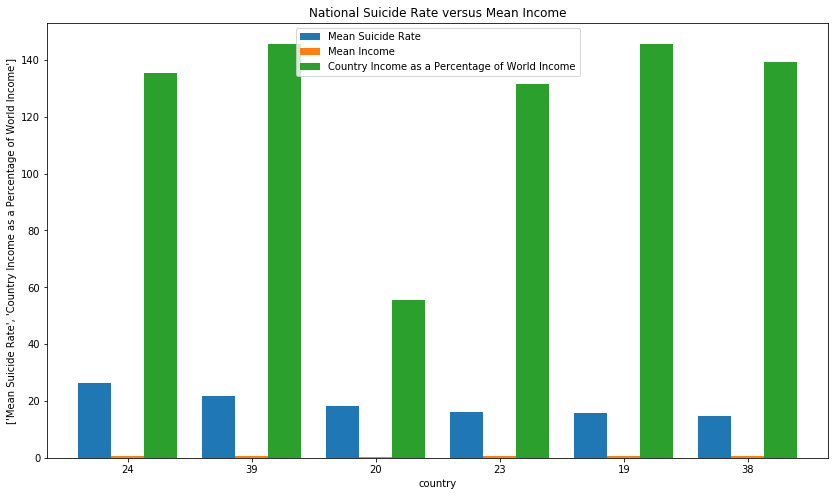

In [36]:
sui_h2l = sui_inco.sort_values('Mean Suicide Rate', ascending=False).head(6)

#sui_h2l.plot.bar(x='country', y=["Mean Suicide Rate", "Country Income as a Percentage of World Income"], figsize=[14,8], rot=0, width=.8)
draw_bar(sui_h2l, 'country', ['Mean Suicide Rate', 'Country Income as a Percentage of World Income'], "National Suicide Rate versus Mean Income")

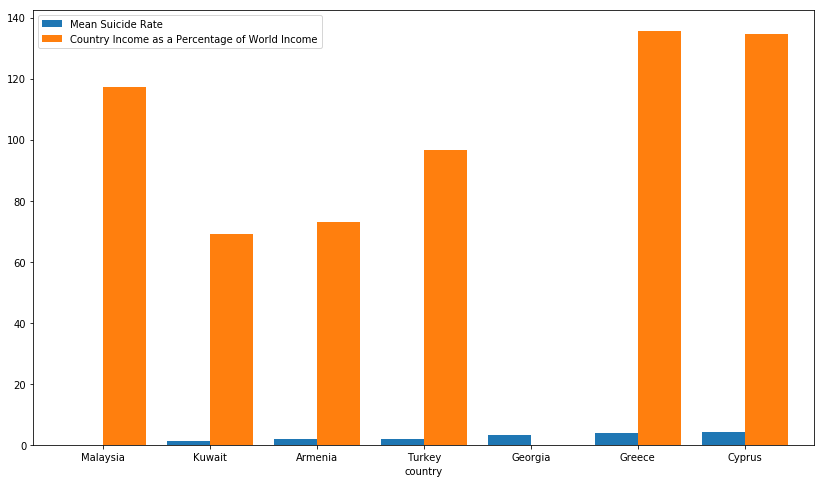

In [73]:
# Now let's do the same for the six countries with the lowest
sui_inco_l2h = sui_inco.sort_values('Mean Suicide Rate', ascending=True).head(7)
sui_inco_l2h.plot.bar(x='country', y = ["Mean Suicide Rate", "Country Income as a Percentage of World Income"], figsize=[14,8], rot=0, width=.8)

In [77]:
# Why is Georgia zero?
sui_inco_l2h.head()

,country,Mean Suicide Rate,Mean Income,Country Income as a Percentage of World Income
26,Malaysia,0.082,0.6472,117.362536
21,Kuwait,1.282,0.3808,69.053853
0,Armenia,1.944,0.4024,72.970773
43,Turkey,2.055,0.5334,96.726169
12,Georgia,3.280,NaN,NaN


In [78]:
# We can't use Georgia
# So I made the head 7-tall instead of 6-tall
# Now I'll drop Gerogia
sui_inco_l2h = sui_inco_l2h.drop(12)


In [79]:
sui_inco_l2h

,country,Mean Suicide Rate,Mean Income,Country Income as a Percentage of World Income
26,Malaysia,0.0820,0.6472,117.362536
21,Kuwait,1.2820,0.3808,69.053853
0,Armenia,1.9440,0.4024,72.970773
43,Turkey,2.0550,0.5334,96.726169
14,Greece,3.7725,0.7486,135.750301
6,Cyprus,4.2020,0.7432,134.771071


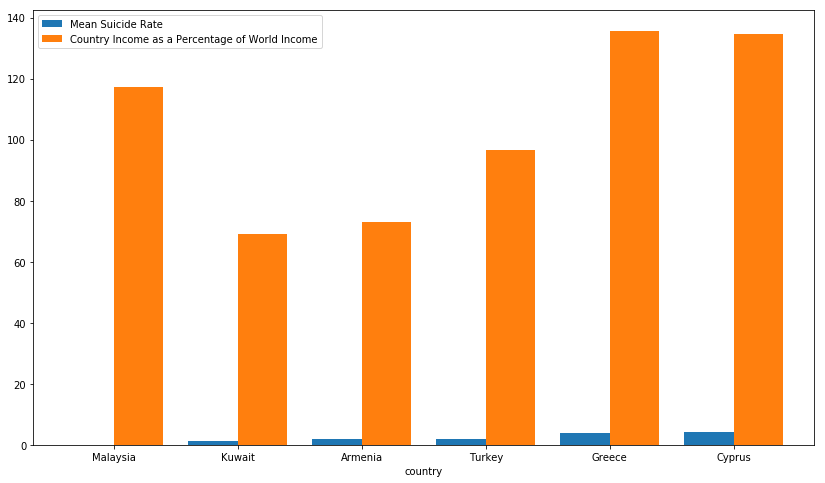

In [80]:
# Redo the lowest suicide-rates versus incomes
sui_inco_l2h.plot.bar(x='country', y = ["Mean Suicide Rate", "Country Income as a Percentage of World Income"], figsize=[14,8], rot=0, width=.8)


In [82]:
# Let's look at the proportion of income above or below the world-mean for both high- and low-suicide-rate countries
# To make it more statistically relevant, we'll take the top and bottom ten (instead of the top and bottom six)
hi_sui_inco_mofm = sui_inco.sort_values('Mean Suicide Rate', ascending=False).head(10)['Country Income as a Percentage of World Income'].mean()
hi_sui_inco_mofm

129.92569527988113

In [83]:
lo_sui_inco_mofm = sui_inco.sort_values('Mean Suicide Rate', ascending=True).head(10)['Country Income as a Percentage of World Income'].mean()
lo_sui_inco_mofm

112.305195826355

Text(0.5,1,'Average Incomes as a percentage of World Average of 10 countries with highest and lowest suicide rates')

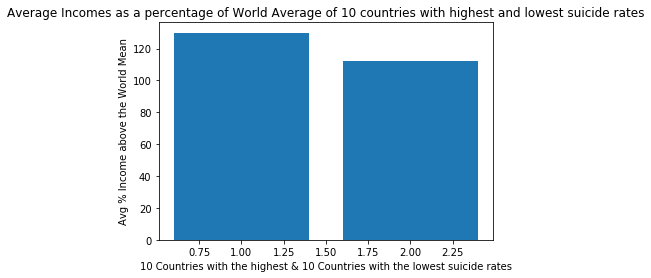

In [85]:
#The countries with the lowest suicide rates have incomes averaging 12% over the world mean
#The countries with the highest suicide rates have higher incomes -- incomes about 30% over the world mean
plt.bar(x = [1,2], height=[hi_sui_inco_mofm, lo_sui_inco_mofm])
plt.xlabel("10 Countries with the highest & 10 Countries with the lowest suicide rates")
plt.ylabel("Avg % Income above the World Mean")
plt.title("Average Incomes as a percentage of World Average of 10 countries with highest and lowest suicide rates")

In [86]:
# Let's see what happens if we zoom into the three highest and three lowest suicide rates
hi_sui_3 = sui_inco.sort_values('Mean Suicide Rate', ascending=False).head(3)['Country Income as a Percentage of World Income'].mean()
hi_sui_3

112.15206519944331

In [87]:
lo_sui_3 = sui_inco.sort_values('Mean Suicide Rate', ascending=True).head(3)['Country Income as a Percentage of World Income'].mean()
lo_sui_3

86.462387658339821

Text(0.5,1,'Average income of the 3 countries with the highest suicide rates and the the countries with the lowest suicide rates')

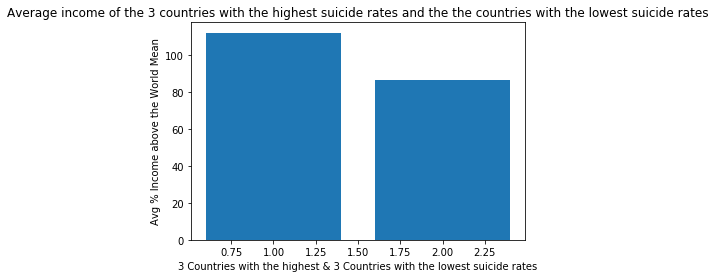

In [97]:
plt.bar(x = [1,2], height=[hi_sui_3, lo_sui_3])
plt.xlabel("3 Countries with the highest & 3 Countries with the lowest suicide rates")
plt.ylabel("Avg % Income above the World Mean")
plt.title("Average income of the 3 countries with the highest suicide rates and the the countries with the lowest suicide rates")

The average income of the ten countries with the highest suicide rates is about 30% more than the world-mean income rate.
The average income of the ten countries with the lowest suicide rates is about 12% above the world-mean.

The average income of the three countries with the highest suicide rates is about 12% over the world-mean.
The average income of the three countries with the lowest suicide rates is about 14% below the world-mean.
In both cases, zooming in on three countries allowed an outlier (the relatively poor Kazakhstan in the high-suicide rate countries and the relatively rich Malaysia in the low-suicide rate countries) to greatly influence the average. Interesting, both these outliers are Muslim countries, which makes it seem less likely that a country's religiousity is the defining factor in its suicide rates.

We lost a lot of the poorer countries by jettisoning any country with more than two NaN values in the five year period from 2012 to 2016. Per the trends outlined above, that loss of data will more likely impact our insights into countries with lower suicide rates than countries with higher suicide rates. 

### Question 2: Relationship between the Inequality Index and Suicide Rates
We'll compare the mean inequality index for the countries with the ten highest suicide rates against the mean inequality index for the countries with the ten lowest suicide rates.

In [105]:
# merge the inequality and the suicide rate data frames
sui_ineq = pd.merge(left=sui_2, right=df_ineq_clean, how='left', left_on='country', right_on='country')
sui_ineq.head()

,country,2012_x,2013_x,2014_x,2015_x,2016_x,mean_x,2012_y,2013_y,2014_y,2015_y,2016_y,mean_y
0,Armenia,2.39,1.92,1.54,2.02,1.85,1.944,29.6,30.6,31.5,32.4,32.5,31.32
1,Australia,10.30,10.20,11.20,11.60,NaN,10.825,NaN,NaN,NaN,NaN,NaN,NaN
2,Austria,10.90,10.70,11.20,10.20,9.75,10.550,30.5,30.8,30.5,30.5,30.8,30.62
3,Belgium,14.80,13.70,13.50,13.30,NaN,13.825,27.5,27.7,28.1,27.7,27.6,27.72
4,Bulgaria,8.38,7.00,6.85,NaN,NaN,7.410,36.0,36.6,37.4,38.6,40.6,37.84


In [106]:
# Let's make the dataframe just index, country, mean suicide, mean income
sui_ineq = sui_ineq.drop(['2012_x', '2013_x', '2014_x', '2015_x', '2016_x', '2012_y', '2013_y', '2014_y', '2015_y', '2016_y'], axis=1)
sui_ineq.head()

,country,mean_x,mean_y
0,Armenia,1.944,31.32
1,Australia,10.825,NaN
2,Austria,10.550,30.62
3,Belgium,13.825,27.72
4,Bulgaria,7.410,37.84


In [107]:
#drop countries with NaN values
sui_ineq = sui_ineq.dropna()
sui_ineq.head()

,country,mean_x,mean_y
0,Armenia,1.944,31.32
2,Austria,10.550,30.62
3,Belgium,13.825,27.72
4,Bulgaria,7.410,37.84
5,Croatia,12.240,31.72


In [108]:
# rename columns
sui_ineq.rename(columns = {'mean_x': 'Mean Suicide Rate', 'mean_y': 'Mean Inequality Index Score'}, inplace=True)
sui_ineq.head(10)

,country,Mean Suicide Rate,Mean Inequality Index Score
0,Armenia,1.9440,31.32
2,Austria,10.5500,30.62
3,Belgium,13.8250,27.72
4,Bulgaria,7.4100,37.84
5,Croatia,12.2400,31.72
6,Cyprus,4.2020,34.76
7,Czech Republic,11.2000,25.96
8,Denmark,8.4675,28.22
9,Estonia,13.5250,33.30
10,Finland,13.7000,27.06


In [109]:
# Let's see the top ten highest suicide rate countries
hi_sui_ineq_mofm = sui_ineq.sort_values('Mean Suicide Rate', ascending=False)
hi_sui_ineq_mofm.head(10)

,country,Mean Suicide Rate,Mean Inequality Index Score
24,Lithuania,26.160,36.78
20,Kazakhstan,18.300,27.26
23,Latvia,16.175,34.86
38,Slovenia,14.825,25.54
15,Hungary,14.660,30.78
3,Belgium,13.825,27.72
10,Finland,13.700,27.06
29,Moldova,13.540,27.56
9,Estonia,13.525,33.30
32,Poland,13.050,32.38


In [110]:
# and the inequality rates of the ten lowest suicide levels
lo_sui_ineq_mofm = sui_ineq.sort_values('Mean Suicide Rate', ascending=True)
lo_sui_ineq_mofm.head(10)

,country,Mean Suicide Rate,Mean Inequality Index Score
0,Armenia,1.9440,31.320000
43,Turkey,2.0550,41.280000
12,Georgia,3.2800,37.660000
14,Greece,3.7725,35.840000
6,Cyprus,4.2020,34.760000
17,Israel,4.6850,40.033333
18,Italy,5.0300,35.080000
42,Thailand,5.5280,37.400000
27,Malta,5.8300,29.140000
40,Spain,5.8825,35.940000


In [116]:
# glancing at them, the countries with lower suicide rates tend to have a higher inequality mean.
# let's graph the differences as a percent of the world-mean inequality score
sui_ineq['Inequality Index as a Percentage of World Inequality Index'] = ((sui_ineq['Mean Inequality Index Score']/35.838051282051275)*100)
sui_ineq.head()

,country,Mean Suicide Rate,Mean Inequality Index Score,Inequality Index as a Percentage of World Inequality Index
0,Armenia,1.944,31.32,87.393145
2,Austria,10.550,30.62,85.439913
3,Belgium,13.825,27.72,77.347956
4,Bulgaria,7.410,37.84,105.586098
5,Croatia,12.240,31.72,88.509277


In [121]:
#calculate the mean inequality indexes as a percent of world inequality index for the ten countries with the most 
# and the ten with the least annual suicides
# highest suicide countries first
hi_sui_ineq = sui_ineq.sort_values('Mean Suicide Rate', ascending=False).head(10)['Inequality Index as a Percentage of World Inequality Index'].mean()
hi_sui_ineq

84.613975691214904

In [119]:
# now lowest suicide countries
lo_sui_ineq = sui_ineq.sort_values('Mean Suicide Rate', ascending=True).head(10)['Inequality Index as a Percentage of World Inequality Index'].mean()
lo_sui_ineq

100.02031932826019

Text(0.5,1,'Average Inequality Indexes as a percentage of World Average of 10 countries with highest and lowest suicide rates')

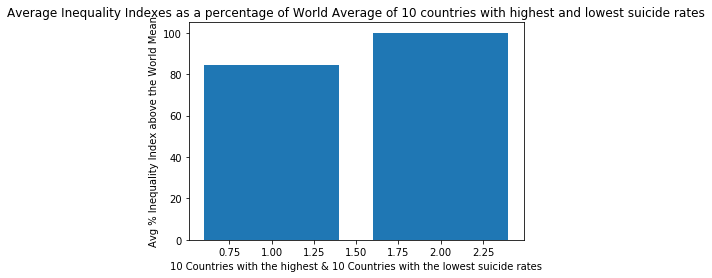

In [122]:
#The countries with the highest suicide rates have incomes inequality indexes about 16% below the world mean
#The countries with the lowest suicide rates have income inequality indexes at about the world mean
plt.bar(x = [1,2], height=[hi_sui_ineq, lo_sui_ineq])
plt.xlabel("10 Countries with the highest & 10 Countries with the lowest suicide rates")
plt.ylabel("Avg % Inequality Index above the World Mean")
plt.title("Average Inequality Indexes as a percentage of World Average of 10 countries with highest and lowest suicide rates")

In [ ]:
#The countries with the highest suicide rates tend to have less sunshine than the countries with the lowest suicide rates


<a id='conclusions'></a>
## Conclusions

I had expected countries with higher incomes and more inequality to have higher suicide rates. 

That assumption was borne out relatively well in the case of income. The ten countries with the highest suicide rates had income levels about 30% above the world average; whereas the ten countries with the lowest suicide rates had income levels about 12% above the world mean. Since we lost a lot of poor countries by throwing out rows with more than two NaN values, it seems possible that a fuller data set would demonstrate that the countries with the lowest suicide rates had income levels even lower than 12%. On the other hand, it is possible that poorer countries are also not tracking suicide rates as well as richer ones, and this is at least partially the cause of their apparently lower suicide rates.

I was surprised that the countries with the highest suicide rates actually had inequality indexes lower than the world mean. Although, upon it does seem possible that upward-mobility adds some pressure, stress, and sense of failure to many lives.

Just glancing at the countries with the highest and lowest suicide rates, one notices a trend in sunlight-levels. Given the influence of sunlight on depression, it would be interesting to compare average daily insolation-levels with suicide rates. Since countries can vary greatly in insolation levels, this investigation would best be done a more localized scale (or at least using only smaller countries). 

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
#

In [124]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0